# <font color='green'>Implementing SGD Classifier with Logloss and L2 regularization without sklearn</font>

## Importing packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

## Creating custom dataset

In [ ]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

# Splitting data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# Sklearn's Implementation of SGD classifier


In [ ]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Documentation : (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

# Implementing Logistic Reg with L2 regularization using SGD



___
Steps to be followed while implementing the Log - Regression:

* Initialize the weight_vector and intercept term to zeros: We have created a function initialize_weights() which takes care of this step.

* Create a loss function : def logloss 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

Now the final Algorithm can be summarized as:

* for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector : def gradient_dw()

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept : def gradient_db()

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept:<br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    
    * calculate the log loss for train and test with the updated weights

    * We can compare the previous loss and the current loss, if it is not updating, then you can stop the training.(This was not implemented here)
    * Append the loss in a list ( this will be used to see how loss is changing for each epoch after the training is over )


### Initialize weights

In [ ]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    # initialize the weights to zeros array of (1,dim) dimensions
    # initialize bias to zero
    w = np.zeros_like(dim)
    b = np.PZERO
    return w,b

### Compute sigmoid

$sigmoid(z)= 1/(1+exp(-z))$

In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

### Compute log-loss

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [ ]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    s =0
    for yt, yp in zip(y_true, y_pred):
        s+=yt*np.log10(yp) + (1-yt)*np.log10(1-yp)
    loss = -s/len(y_true)
    return loss

### Compute gradient w.r.to  'w'

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [ ]:
# NOTE: Here lambda = alpha
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    # val will store dot product of (w, x )+ b i.e. wTx+b
    val = np.dot(x,w) + b
    dw = x*(y-sigmoid(val)) - alpha*w/N

    return dw

### Compute gradient w.r.to 'b'

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [ ]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    # val will store dot product of (w, x )+ b i.e. wTx+b
    z = np.dot(w,x) + b
    db = y - sigmoid(z)
    return db

### Implementing logistic regression

In [ ]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' 
    In this function, we will implement logistic regression
    The final output of this function is the weights and the bias term.
    '''
    #Here eta0 is learning rate
    #implement the code as follows
    
    # Create two empty list to store the train and test loss for each epoch
    global train_loss; global test_loss
    train_loss = []
    test_loss = []
    
    
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    weights, bias = initialize_weights(X_train[0])
    
    N = len(X_train)
    
    # for every epoch
    for i in range(epochs):
        
        # for every data point(X_train,y_train) we need to calculate the gradients, 
        for x,y in zip(X_train, y_train):
            
            #compute gradient w.r.to w (call the gradient_dw() function)
            dw = gradient_dw(x,y,weights,bias,alpha,N)
            
            #compute gradient w.r.to b (call the gradient_db() function)
            db = gradient_db(x,y,weights,bias)
            
            #update w, b
            weights = weights + eta0 * dw
            bias = bias + eta0 * db
        
        # predict the output of x_train[for all data points in X_train] using w,b
        y_pred_train=[]
        for x_tr in X_train:
            y_pred_train.append(sigmoid(np.dot(weights,x_tr)+bias))
            
        # compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        train_loss.append(logloss(y_train, y_pred_train))
                
        # predict the output of x_test[for all data points in X_test] using w,b
        y_pred_test=[]
        for x_te in X_test:
            y_pred_test.append(sigmoid(np.dot(weights,x_te)+bias))
        
        # compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        test_loss.append(logloss(y_test, y_pred_test))
        
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    return weights,bias

In [ ]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=14
w,b=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

## Comparing our implementation and SGDClassifier's weights and intercept terms

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w - clf.coef_, b - clf.intercept_

(array([[-4.75139040e-03,  7.60245639e-03,  1.85102713e-03,
          6.50362355e-05,  1.54498740e-03,  2.34086809e-03,
         -9.09928936e-04,  2.16124544e-03,  5.21959720e-03,
         -4.49834999e-03,  1.23628554e-03,  2.54417563e-03,
          1.74962845e-03, -1.28756176e-03,  1.05365463e-03]]),
 array([0.00279952]))

___
### If we take a look at the values they are pretty close i.e difference is in terms of 10^-3.

# Plot epoch number vs train , test loss

* epoch number on X-axis
* loss on Y-axis

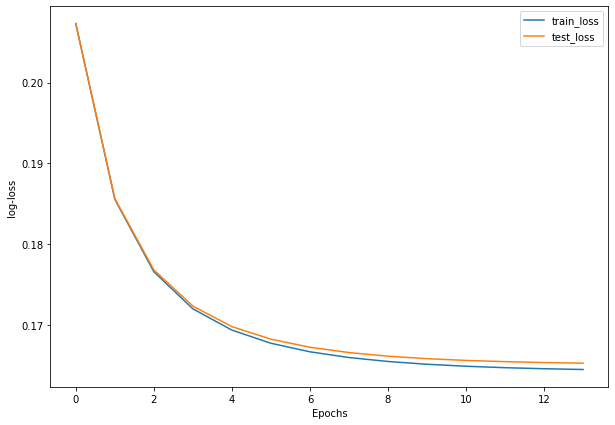

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), test_loss, label='test_loss')
plt.xlabel("Epochs")
plt.ylabel('log-loss')
plt.legend();

In [ ]:
def pred(w,b, X):
    '''
    This function return the predicted labels as numpy array given the weights, bias term and the data.
    '''
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

# Printing the accuracy of the trained logistic regression model on train and test data.
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9505866666666667
0.9476
